In [22]:
from data import get_loader, get_data_path
import torch.nn as nn
from torch.utils import data
import numpy as np

IMG_MEAN = np.array((104.00698793,116.66876762,122.67891434), dtype=np.float32)
input_size = (512,1024)

num_classes = 19
data_loader = get_loader('cityscapes')
data_path = get_data_path('cityscapes')
test_dataset = data_loader( data_path, img_size=input_size, img_mean = IMG_MEAN, is_transform=True, split='val')
testloader = data.DataLoader(test_dataset, batch_size=1, shuffle=False, pin_memory=True)
interp = nn.Upsample(size=input_size, mode='bilinear', align_corners=True)
ignore_label = 250

Found 478 val images


In [23]:
from torchvision import transforms
from trainUDA import DeNormalize

restore_transform = transforms.Compose([
DeNormalize(IMG_MEAN),
transforms.ToPILImage()])


In [24]:
img, label, _, _, _ = test_dataset[0]
image = restore_transform(img)

In [25]:
type(img)

torch.Tensor

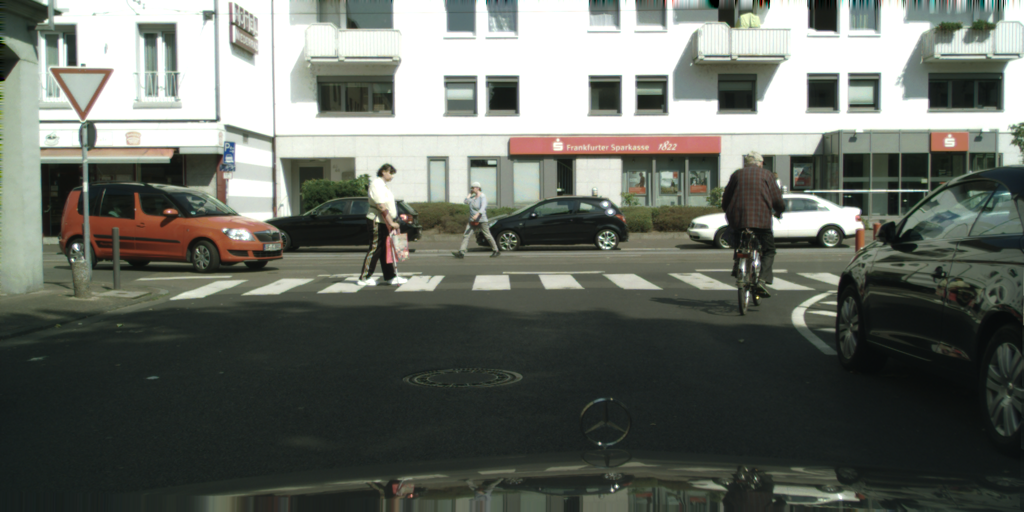

In [4]:
image

# GTA

In [26]:
num_classes = 19
data_loader = get_loader('gta_test')
data_path = get_data_path('gta')
test_dataset = data_loader(data_path, list_path = './data/gta5_list/train.txt', img_size=(1280,720), mean=IMG_MEAN)
testloader = data.DataLoader(test_dataset, batch_size=1, shuffle=True, pin_memory=True)
interp = nn.Upsample(size=(720,1280), mode='bilinear', align_corners=True)
ignore_label = 255

In [39]:
from torchvision import transforms
import torch
class DeNormalize(object):
    def __init__(self, mean):
        self.mean = mean

    def __call__(self, tensor):
        IMG_MEAN = torch.from_numpy(self.mean.copy())
        IMG_MEAN, _ = torch.broadcast_tensors(IMG_MEAN.unsqueeze(1).unsqueeze(2), tensor)
        tensor = tensor+IMG_MEAN
        tensor = (tensor/255).float()
        tensor = torch.flip(tensor,(0,))
        return tensor

    
restore_transform = transforms.Compose([
DeNormalize(IMG_MEAN),
transforms.ToPILImage()])


In [42]:
img, label, _, _, _ = test_dataset[1]
# gta dataset returns numpy array, which is then converted to torch tensor in the dataloader
# however, since I'm using the dataset rather than the dataloader here, I need to convert to tensor manually.
image = restore_transform(torch.tensor(img))

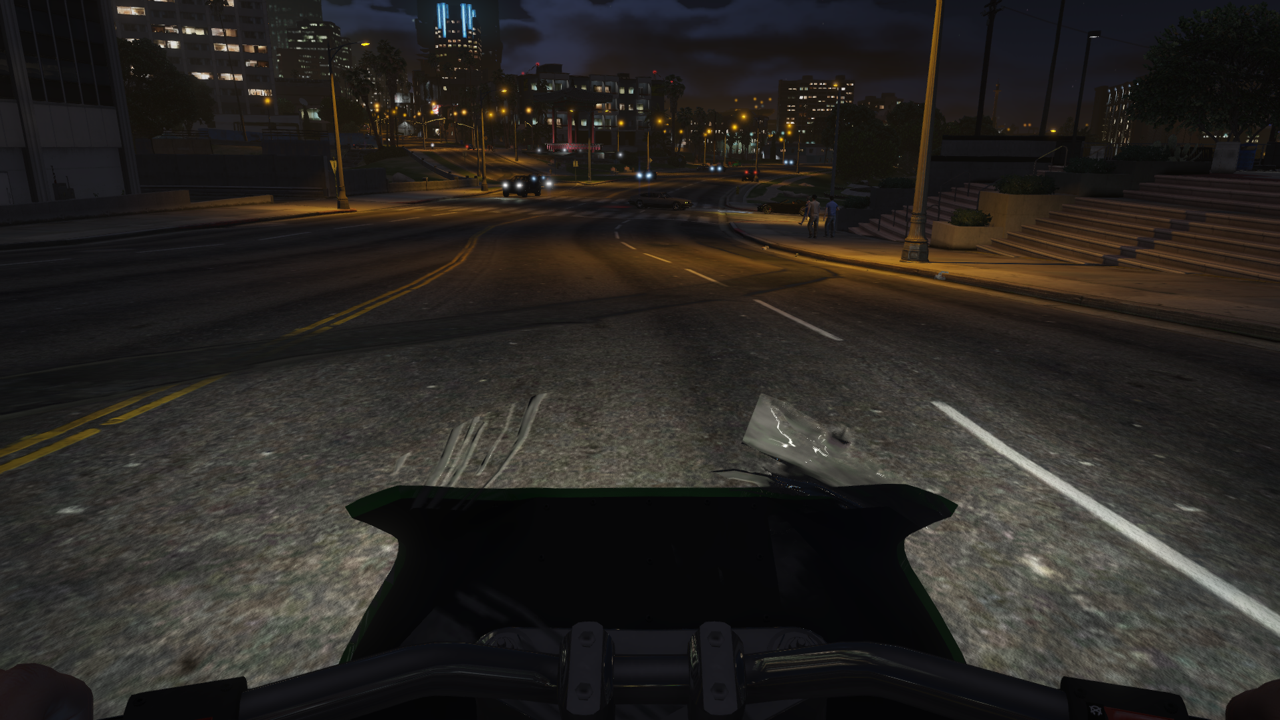

In [43]:
image

# Self-supervised Data Loaders

In [1]:
from data.gta5_dataset import SsGTA5
from data.cityscapes_loader import SsCityscapes
import numpy as np
from data import get_data_path
from torchvision import transforms
import torch
class DeNormalize(object):
    def __init__(self, mean):
        self.mean = mean

    def __call__(self, tensor):
        IMG_MEAN = torch.from_numpy(self.mean.copy())
        IMG_MEAN, _ = torch.broadcast_tensors(IMG_MEAN.unsqueeze(1).unsqueeze(2), tensor)
        tensor = tensor+IMG_MEAN
        tensor = (tensor/255).float()
        tensor = torch.flip(tensor,(0,))
        return tensor

IMG_MEAN = np.array((104.00698793, 116.66876762, 122.67891434), dtype=np.float32)

restore_transform = transforms.Compose([
DeNormalize(IMG_MEAN),
transforms.ToPILImage()])


In [21]:
IMG_MEAN = np.array((104.00698793, 116.66876762, 122.67891434), dtype=np.float32)
data_path = get_data_path('gta')

source_ds = SsGTA5(
    root=data_path,
    list_path='./data/gta5_list/train.txt',
    augmentations=None,
    img_size=(1280,720),
    mean=IMG_MEAN,
    crop_size=256
    )

1


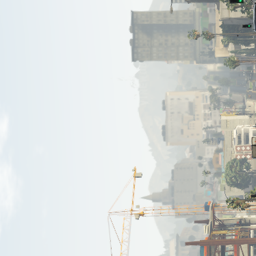

In [52]:
img, label = source_ds[11]
image = restore_transform(torch.tensor(img))
print(label)
image


In [12]:
IMG_MEAN = np.array((104.00698793, 116.66876762, 122.67891434), dtype=np.float32)
data_path = get_data_path('cityscapes')

target_ds = SsCityscapes(
    root=data_path,
    split="train",
    is_transform=True,
    augmentations=None,
    img_mean=IMG_MEAN,
    crop_size=256
    )

Found 2831 train images


3


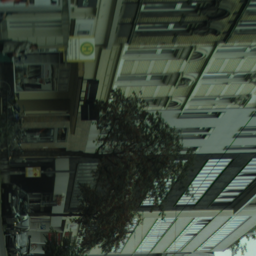

In [47]:
img, label = target_ds[10]
image = restore_transform(torch.tensor(img))
print(label)
image

In [36]:
16*16

256

In [66]:
x = 128
n = 2048 * x
m = 16*16*x*4

print(n+m)


393216


In [61]:
2048*16*16*4

2097152

In [67]:
36992/128

289.0

In [68]:
np.sqrt(289)

17.0

In [69]:
32768/128

256.0

In [70]:
np.sqrt(256)

16.0